## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_clean_w_LXV.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_df= pd.concat(data)

asos_snotel_df.rename(columns={'CloudCover':'CloudCover_oktas', 'LXV_CloudCover':'LXV_CloudCover_oktas'}, inplace=True)

asos_snotel_df = asos_snotel_df.asfreq('1H')

asos_snotel_df = asos_snotel_df.interpolate(limit=3)
asos_snotel_df['Julian'] = asos_snotel_df.index.to_julian_date()

#delete empty columns as they mess up loops
#del asos_snotel_df['Pressure_hp']
del asos_snotel_df['6hr_Precipitation_mm']            #empty column

print(asos_snotel_df.head())


KeyError: 'Pressure_hp'

In [3]:
upper_data = None
upper_data_df = None
asos_snotel_UA_df = None
upper_data = [pd.read_csv('KGJT_2006010100_2018010100.txt', header= 0, parse_dates = ['validUTC'], index_col = 'validUTC')]

#upper_data = [pd.read_csv('KGJT_2006010100_2018010100.txt', header= 0)]
upper_data_df = pd.concat(upper_data)
print(upper_data_df.describe())


del upper_data_df['station']
del upper_data_df['bearing']
del upper_data_df['range_sm']


#upper_data_df.fillna(np.NaN)

#upper_data_df  = pd.to_numeric(upper_data_df[:], errors='coerce').fillna(np.NaN)
upper_data_df = upper_data_df.replace('M', np.NaN)
upper_data_df = upper_data_df.apply(pd.to_numeric)
print(upper_data_df.head())
print(upper_data_df.describe())
print(upper_data_df.dropna())

#UA_500 = upper_data_df.groupby(pressure_mb = 500)
upper_data_df = upper_data_df[upper_data_df['levelcode'] == 4]
asos_snotel_UA_df = upper_data_df.join(asos_snotel_df, how = 'outer') 

levels = [200, 250, 300, 400, 500, 700, 850]

for level in levels:
  print(level)
  asos_snotel_UA_df = asos_snotel_UA_df.join(upper_data_df[upper_data_df['pressure_mb'] == level].add_suffix('_'+str(level)), how= 'outer')
#  test_df = asos_snotel_UA_df.join(upper_data_df.groupby['pressure_mb'][level])     #.add_suffix('_'+str(level)), how= 'outer')


#level_data = upper_data_df[upper_data_df['pressure_mb'] == 200].add_suffix('_200')
#asos_snotel_UA_df = asos_snotel_df.join(UA250_df, how= 'outer')

#asos_snotel_UA_df = asos_snotel_UA_df.join((upper_data_df[upper_data_df['pressure_mb'] == 700]- upper_data_df[upper_data_df['pressure_mb'] == 250].add_suffix('_700_250')), how= 'outer')

#print(test_df.describe())
print(asos_snotel_UA_df.describe())
#print(upper_data[upper_data_df['pressure_mb'][:] == 850] - upper_data_df[upper_data_df['pressure_mb'][:] == 500])

print(upper_data_df['pressure_mb'] == 850)
UAd850_500_df = None
pairs = [[850, 700], [700, 250]]
for pair in pairs:
 UAasos_snotel_UA_df = asos_snotel_UA_df.join(((upper_data_df[upper_data_df['pressure_mb'] == pair[0]]) - (upper_data_df[upper_data_df['pressure_mb'] == pair[1]])).add_suffix('_d'+str(pair[0])+'_'+str(pair[1])))


print(UAasos_snotel_UA_df.keys())

#UAd850_500_df = UAd850_500_df.add_suffix('_d850_500')

#UAd700_500_df = UA700_df[:] - UA500_df[:]
#UAd700_500_df = UAd700_500_df.add_suffix('_d700_500')

#UAd700_250_df = UA700_df[:] - UA250_df[:]
#UAd700_250_df = UAd700_250_df.add_suffix('_d700_250')




c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


          levelcode   pressure_mb
count  1.029496e+06  1.029496e+06
mean   5.269323e+00  2.579351e+02
std    7.495697e-01  2.857809e+02
min    4.000000e+00  4.300000e+00
25%    5.000000e+00  3.980000e+01
50%    5.000000e+00  1.360000e+02
75%    6.000000e+00  4.410000e+02
max    9.000000e+00  9.999900e+03
                     levelcode  pressure_mb  height_m  tmpc  dwpc  drct  \
validUTC                                                                  
2006-12-03 12:00:00          4       1000.0     370.0   NaN   NaN   NaN   
2006-12-03 12:00:00          4        925.0     988.0   NaN   NaN   NaN   
2006-12-27 12:00:00          4        850.0    1463.0   NaN   NaN   NaN   
2006-12-05 00:00:00          4        925.0     934.0   NaN   NaN   NaN   
2006-12-23 12:00:00          4       1000.0     273.0   NaN   NaN   NaN   

                     speed_kts  
validUTC                        
2006-12-03 12:00:00        NaN  
2006-12-03 12:00:00        NaN  
2006-12-27 12:00:00        NaN  
200

200
250
300
400
500
700
850
       levelcode    pressure_mb       height_m           tmpc           dwpc  \
count   135921.0  135921.000000  135845.000000  115578.000000  111942.000000   
mean         4.0     353.637267   12286.756333     -42.185716     -59.270844   
std          0.0     333.955658    9089.885594      23.670801      26.787098   
min          4.0       5.000000    -129.000000     -80.100000     -98.900000   
25%          4.0      70.000000    3192.000000     -59.300000     -78.100000   
50%          4.0     250.000000   10900.000000     -51.700000     -68.900000   
75%          4.0     700.000000   18770.000000     -30.100000     -43.900000   
max          4.0    1000.000000   35900.000000      38.400000      18.800000   

                drct      speed_kts  TOBS.I-1 (degC)   SNWD.I-1 (in)   \
count  114468.000000  114468.000000     211434.000000   194256.000000   
mean      227.322876      30.671148          1.923996       19.784506   
std        90.264630      23.621

**Create a dataset which calculates the delta 12-hour snowdepth and 12-hour snowfall columns.  The delta 12-hour snowdepth contains the raw differences between snowdepth observations every 12 hours.  The 12-hour snowfall column will only include observations greater then or equal to 3 inches due to spurious nature of the snow depth measurements.  This will be useful for as snowfall is an important dependent variable **

In [4]:
fig = plt.figure(figsize=(10,5))

#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_UA_df['12hr_SNWD_in'] = asos_snotel_UA_df['SNWD.I-1 (in) '].resample('12H').last()
asos_snotel_UA_df['12hr-dSNWD_in'] = asos_snotel_UA_df['12hr_SNWD_in']-asos_snotel_UA_df['12hr_SNWD_in'].shift(+12)
asos_snotel_UA_df['12hr-SNOWFALL_in'] = asos_snotel_UA_df['12hr-dSNWD_in'][asos_snotel_UA_df['12hr-dSNWD_in']>=3]

#print(asos_snotel_df['12hr-dSNWD_in'].describe())
print(asos_snotel_UA_df['12hr-SNOWFALL_in'].describe())


count    5547.000000
mean        4.375980
std         2.057561
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        18.000000
Name: 12hr-SNOWFALL_in, dtype: float64


<Figure size 720x360 with 0 Axes>

**Do some quick timeseries plots to visually see the data:**

In [5]:
print(asos_snotel_UA_df.info())
print(asos_snotel_UA_df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231852 entries, 2006-01-01 00:00:00 to 2017-12-31 12:00:00
Data columns (total 76 columns):
levelcode                   135921 non-null float64
pressure_mb                 135921 non-null float64
height_m                    135845 non-null float64
tmpc                        115578 non-null float64
dwpc                        111942 non-null float64
drct                        114468 non-null float64
speed_kts                   114468 non-null float64
TOBS.I-1 (degC)             211434 non-null float64
SNWD.I-1 (in)               194256 non-null float64
Temperature_degC            162269 non-null float64
Dewpoint_degC               162232 non-null float64
WindDirection_deg           156062 non-null float64
WindSpeed_m/s               156062 non-null float64
CloudCover_oktas            91270 non-null float64
1hr_Precipitation_mm        5572 non-null float64
LXV_Temperature_degC        211521 non-null float64
LXV_Dewpoint_degC         

In [6]:
##ax = None
#%matplotlib notebook
#keys = ['Pressure_hp']  #['levelcode_500','height_m_500','TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp', 'Julian']
#keys = ['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', '1hr_Precipitation_mm', '6hr_Precipitation_mm','LXV_Pressure_hp'] #, 'Julian', 'pressure_mb_500', 'height_m_500', 'tmpc_500', 'dwpc_500', 'drct_500', 'speed_kts_500', 'bearing_500', 'range_sm_500', '12hr_SNWD_in', '12hr-dSNWD_in', '12hr-SNOWFALL_in']
##keys = asos_snotel_UA_df.keys().tolist()
##print(keys)
##print(asos_snotel_UA_df.info())
##fig = plt.figure(figsize=(50,400))
##fig.subplots_adjust(hspace=0.3, wspace=0.1)
##for k in range(len(keys)):
##    ax = plt.subplot(75, 1, k+1)
##    asos_snotel_UA_df[keys[k]]['2006':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 2)
##    ax.set_xlabel("Date")
##    ax.set_ylabel(keys[k])
    
##    plt.title("Timeseries of " + keys[k])
 
##    plt.grid()
##    plt.axis('tight')
##    fig.savefig(keys[k]+'.png')
  

#plt.show()



['levelcode', 'pressure_mb', 'height_m', 'tmpc', 'dwpc', 'drct', 'speed_kts', 'TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', '1hr_Precipitation_mm', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', 'LXV_WindSpeed_m/s', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm', 'Julian', 'levelcode_200', 'pressure_mb_200', 'height_m_200', 'tmpc_200', 'dwpc_200', 'drct_200', 'speed_kts_200', 'levelcode_250', 'pressure_mb_250', 'height_m_250', 'tmpc_250', 'dwpc_250', 'drct_250', 'speed_kts_250', 'levelcode_300', 'pressure_mb_300', 'height_m_300', 'tmpc_300', 'dwpc_300', 'drct_300', 'speed_kts_300', 'levelcode_400', 'pressure_mb_400', 'height_m_400', 'tmpc_400', 'dwpc_400', 'drct_400', 'speed_kts_400', 'levelcode_500', 'pressure_mb_500', 'height_m_500', 'tmpc_500', 'dwpc_500', 'drct_500', 'speed_kts_500', 'levelcode_700', 'pressure_mb_700', 'hei

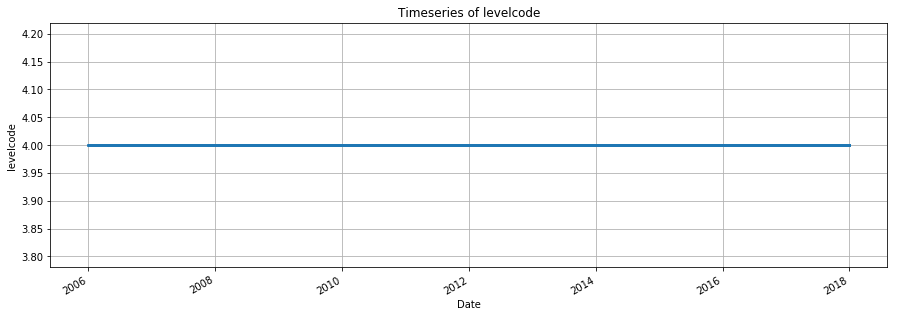

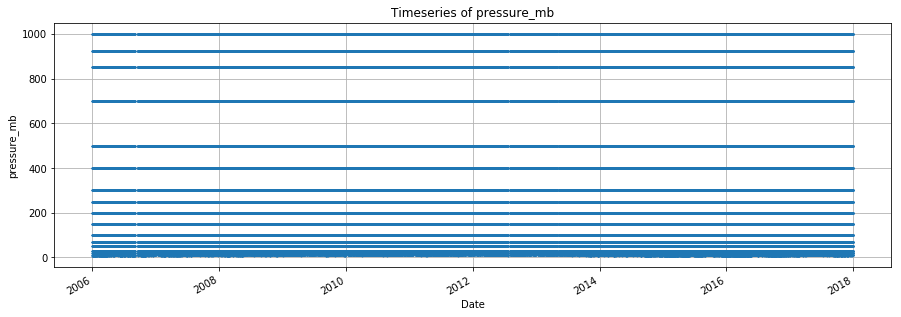

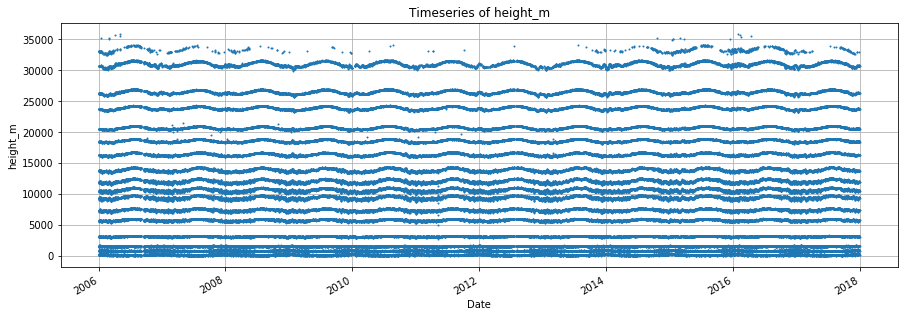

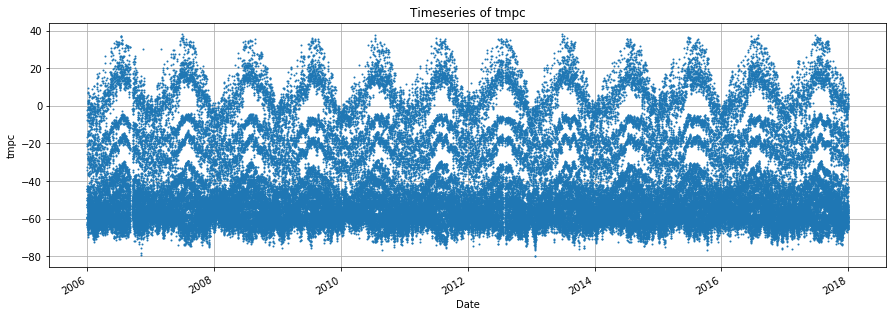

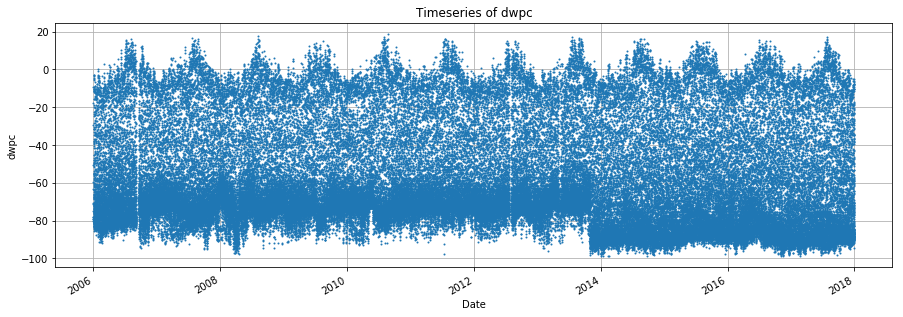

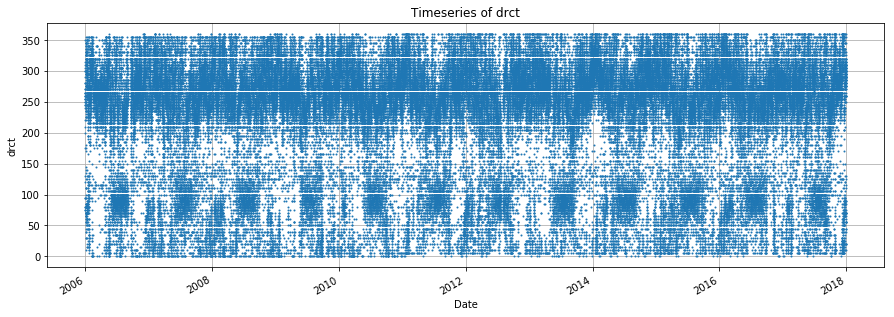

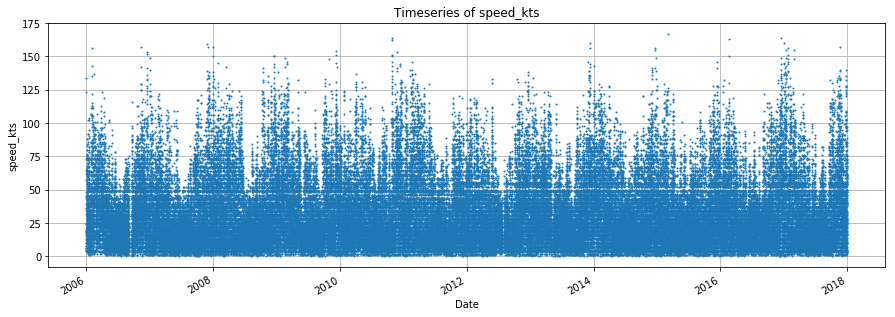

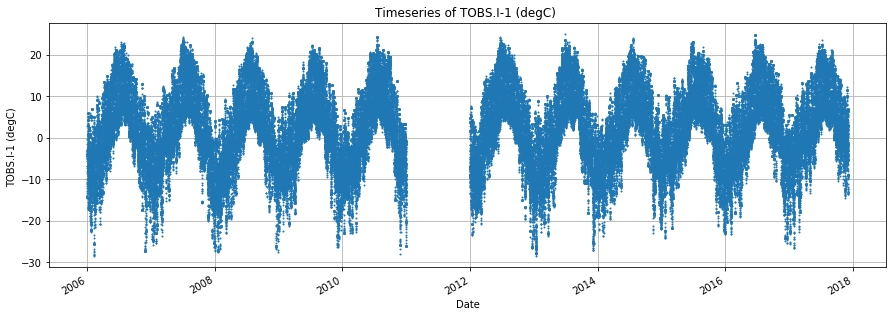

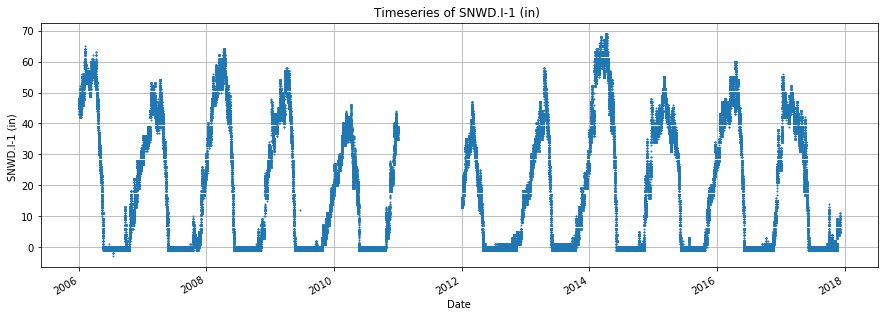

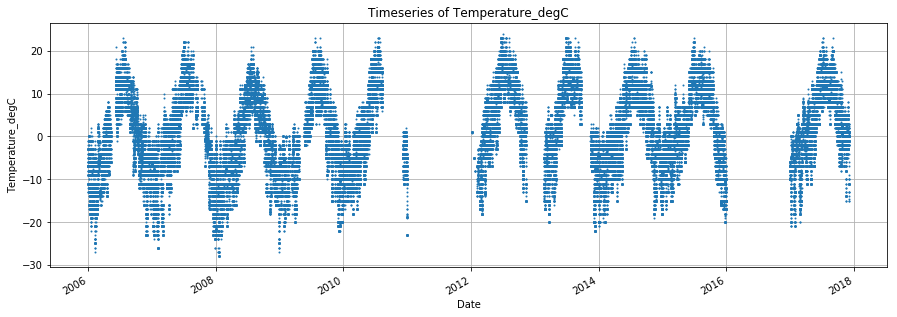

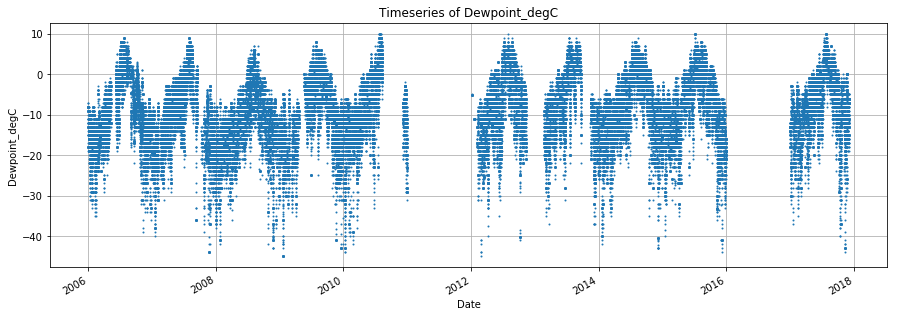

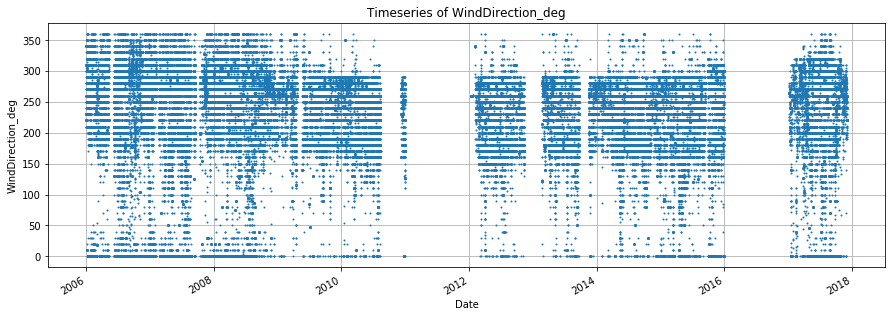

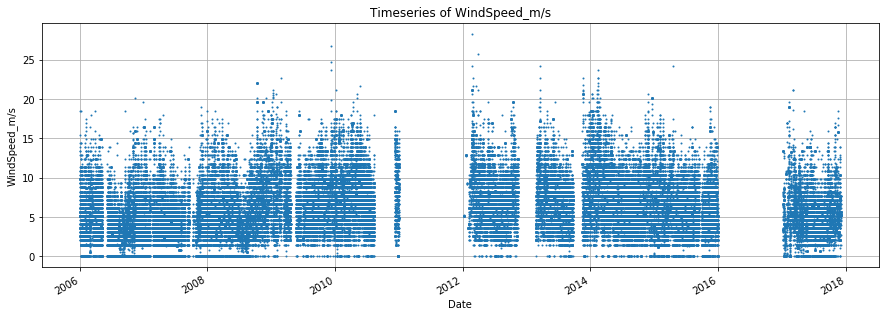

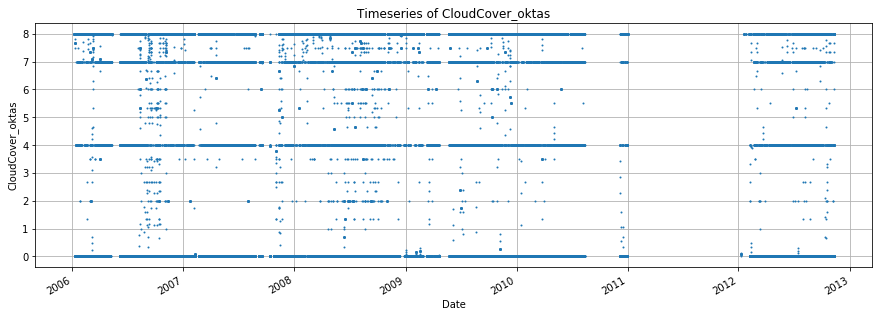

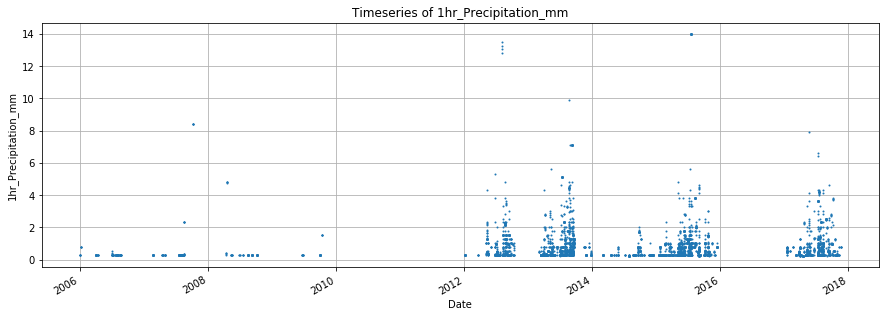

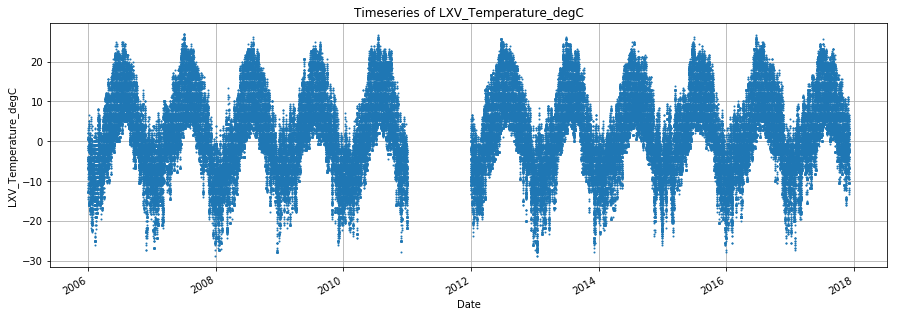

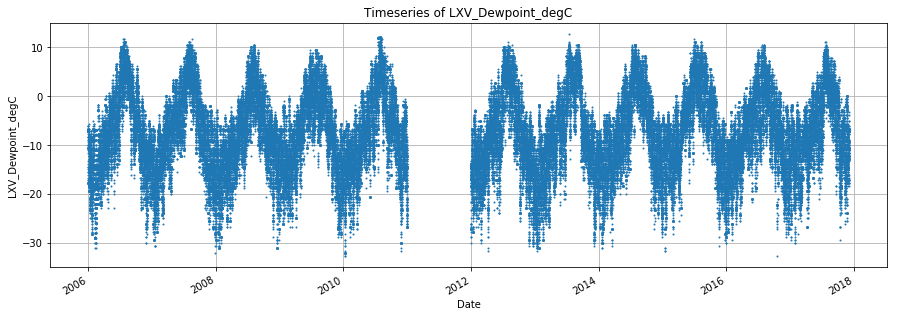

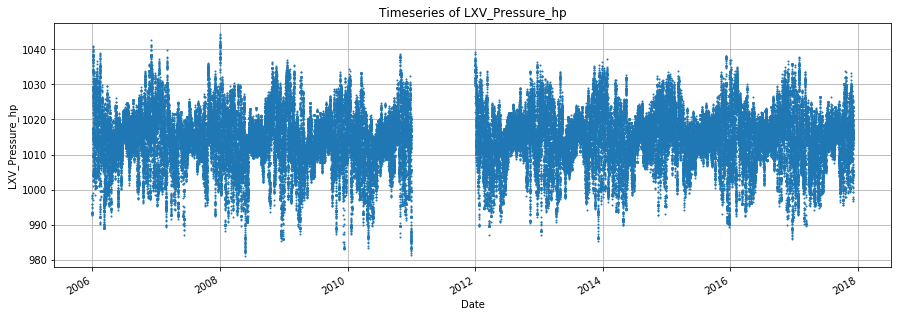

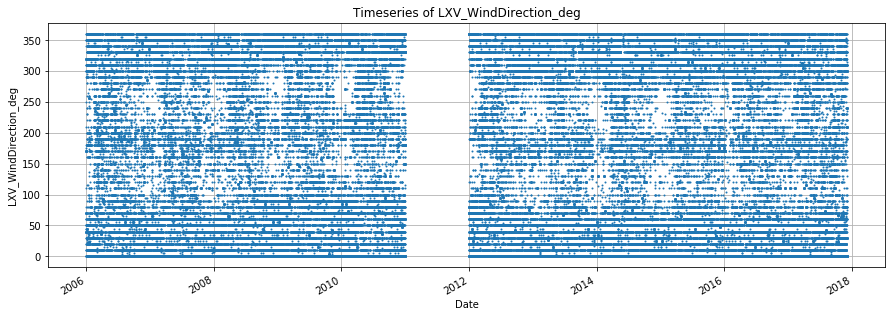

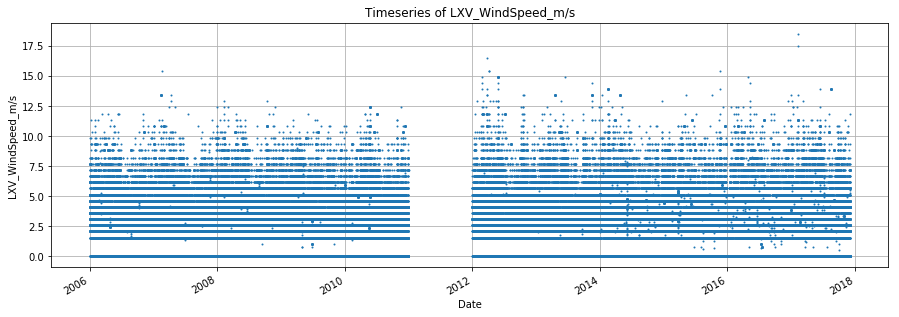

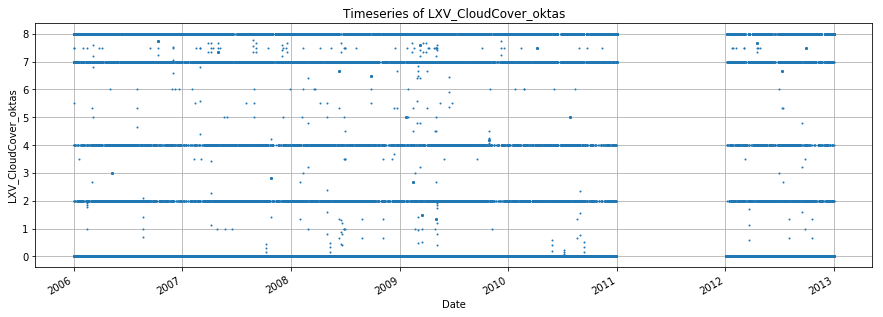

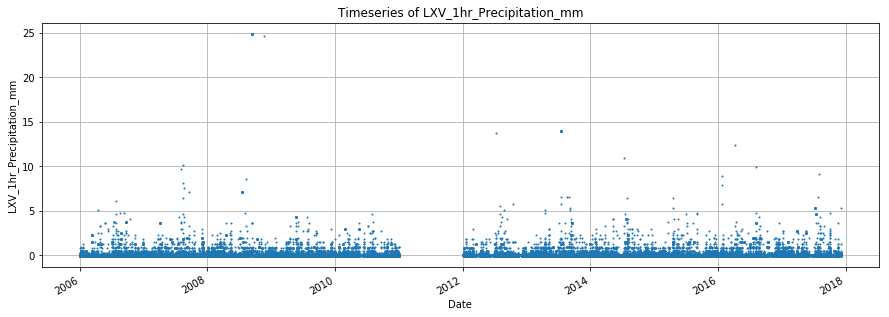

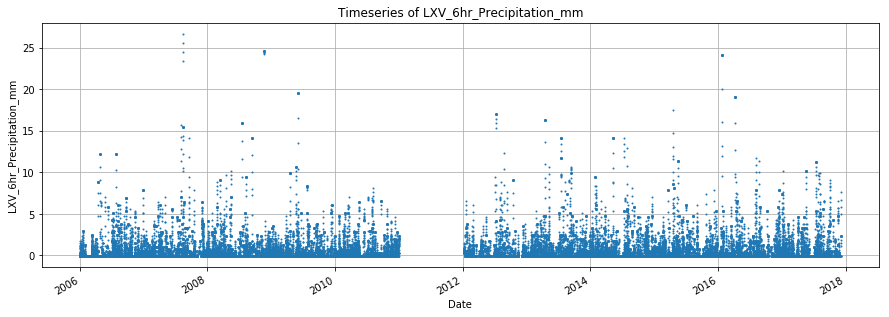

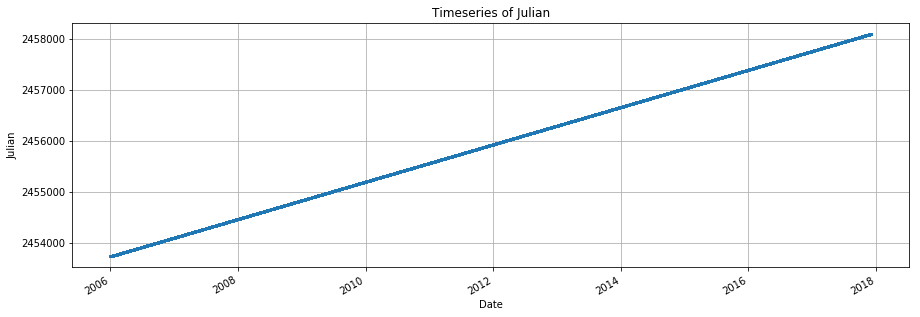

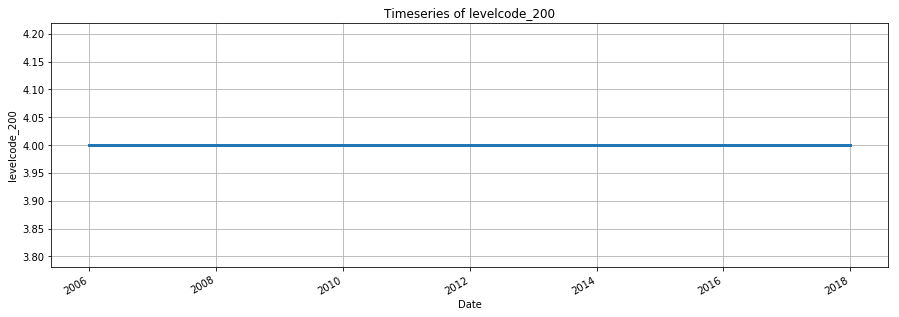

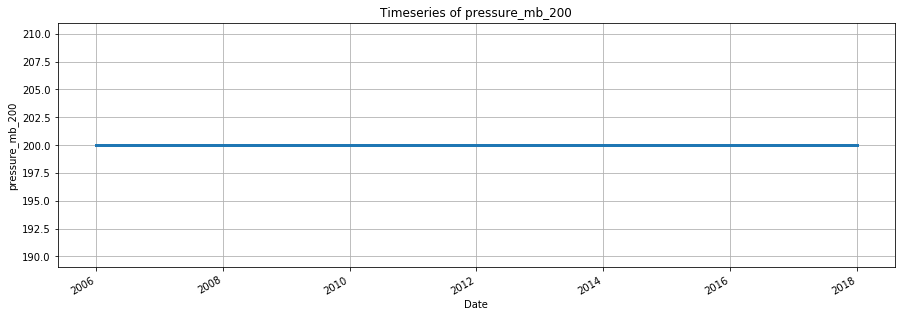

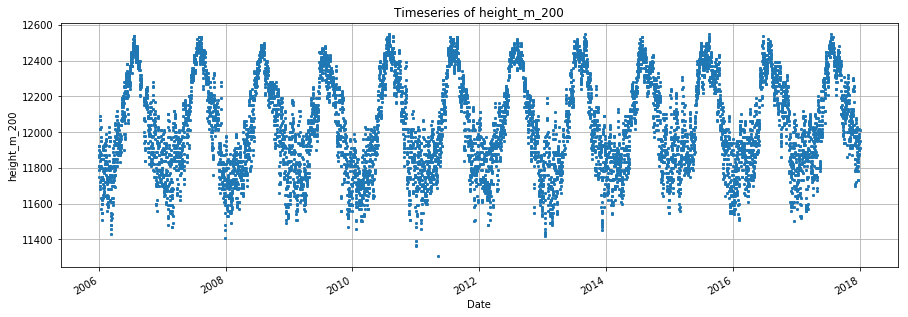

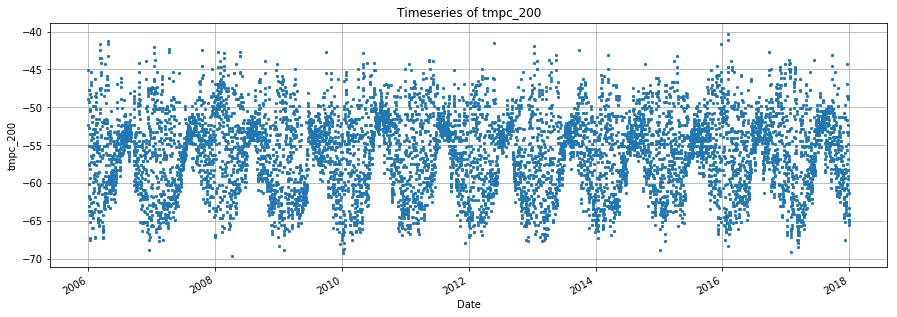

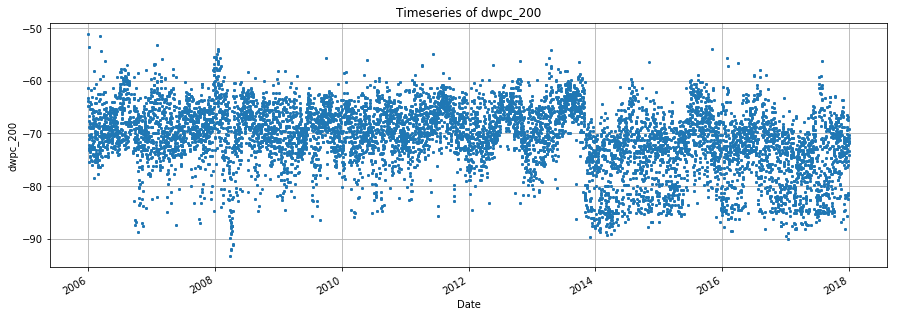

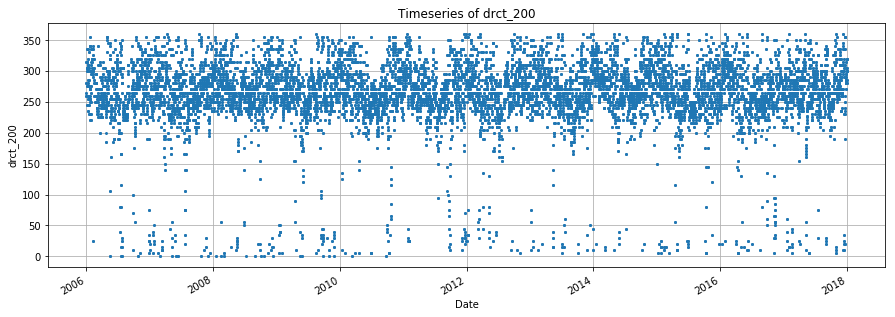

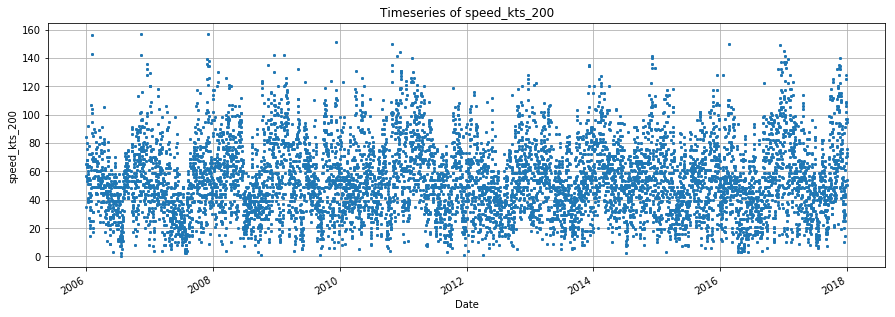

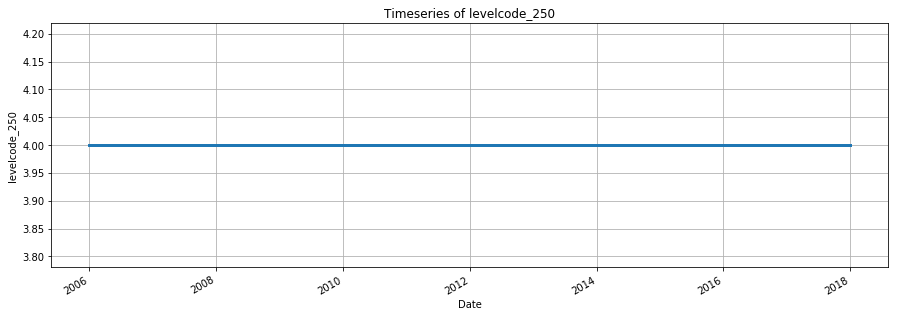

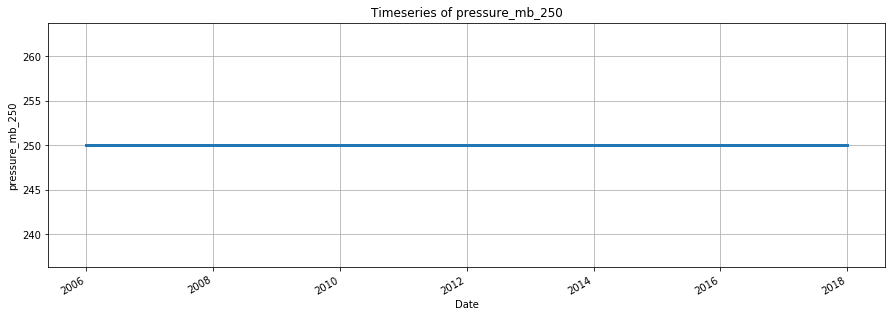

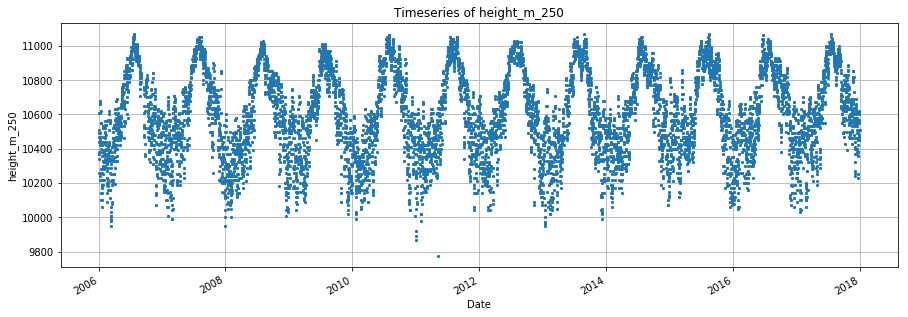

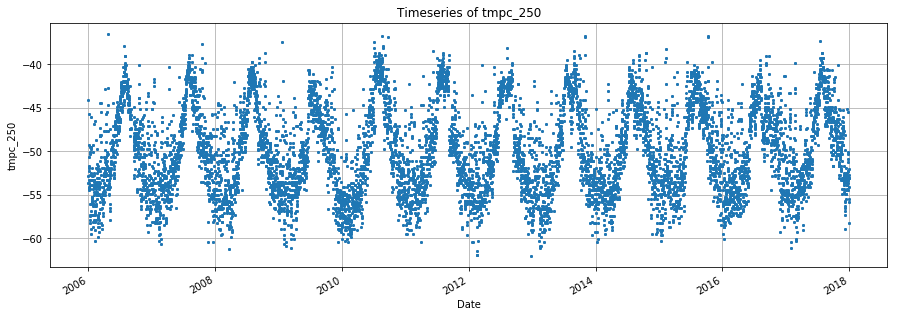

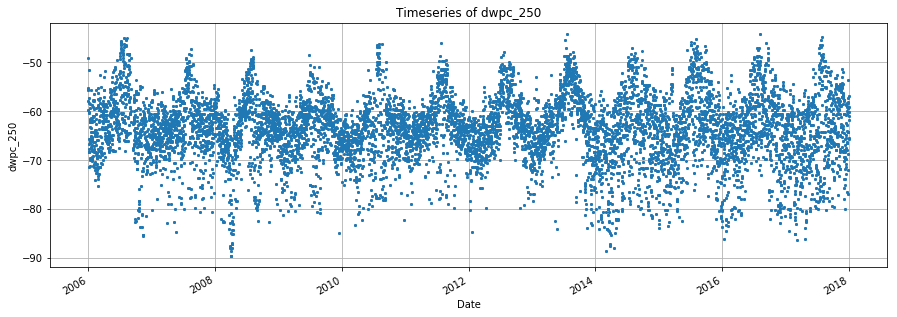

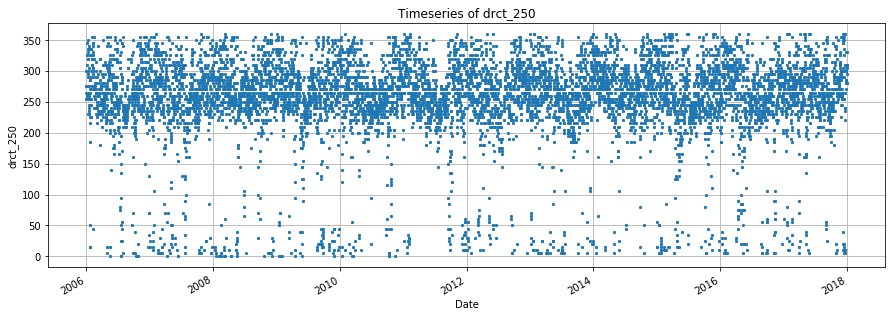

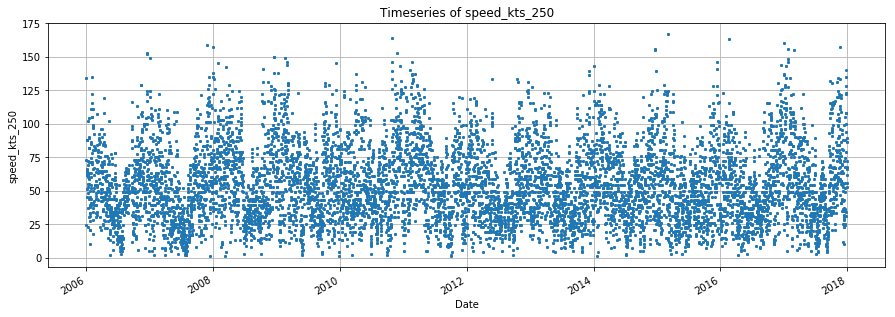

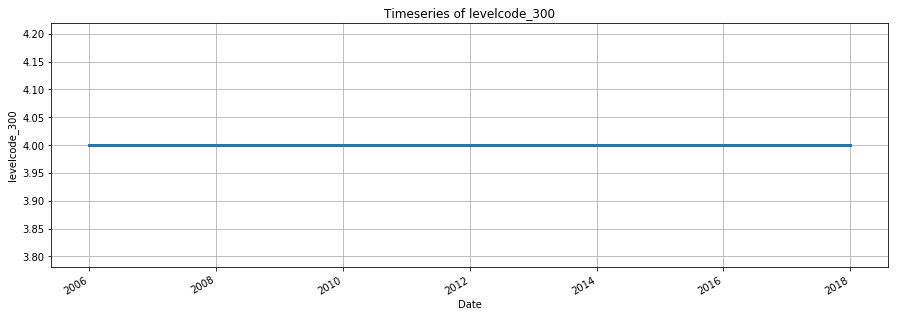

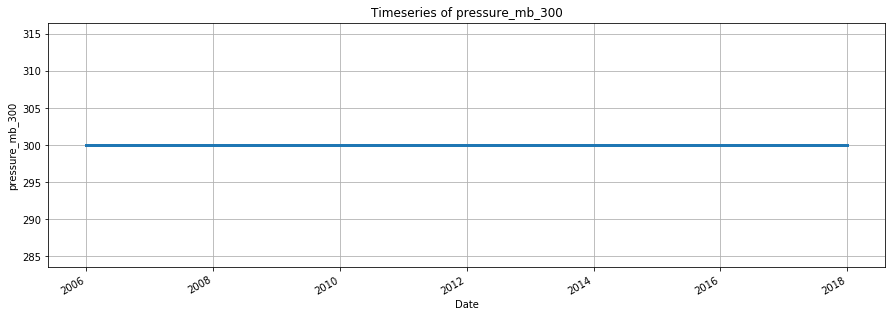

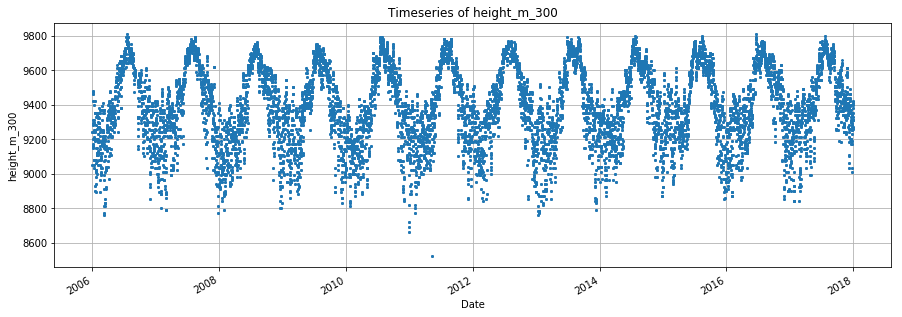

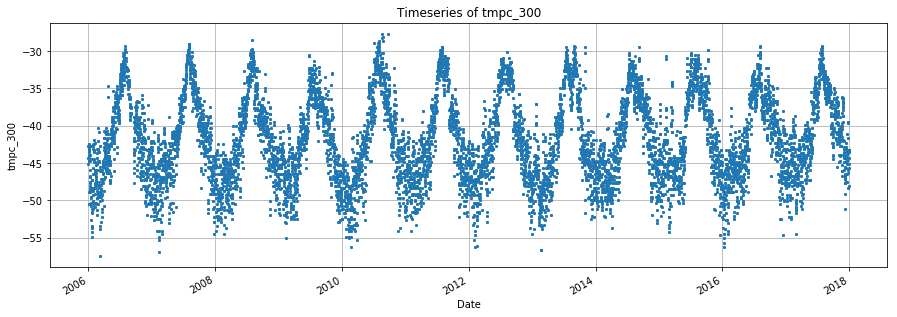

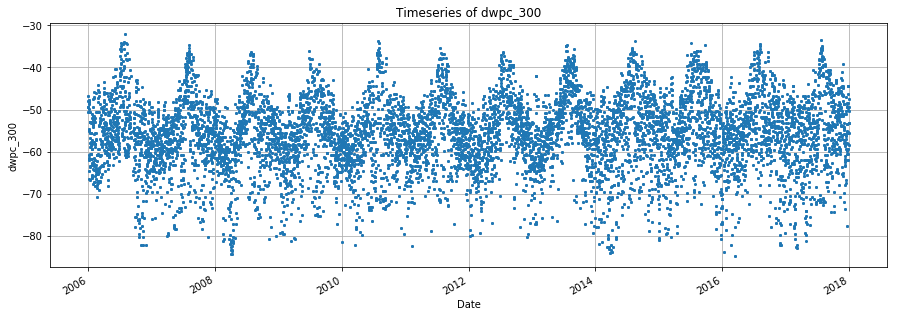

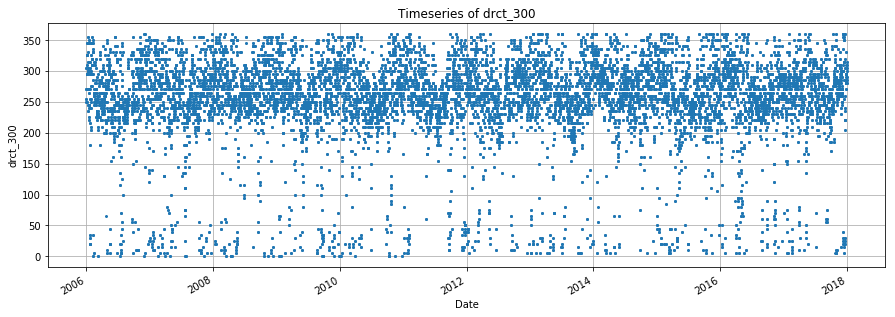

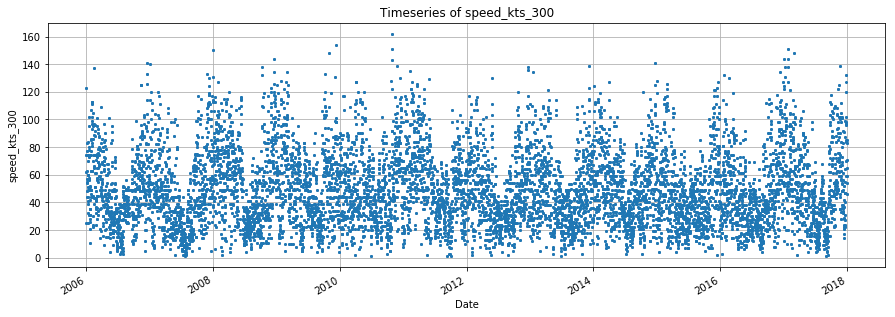

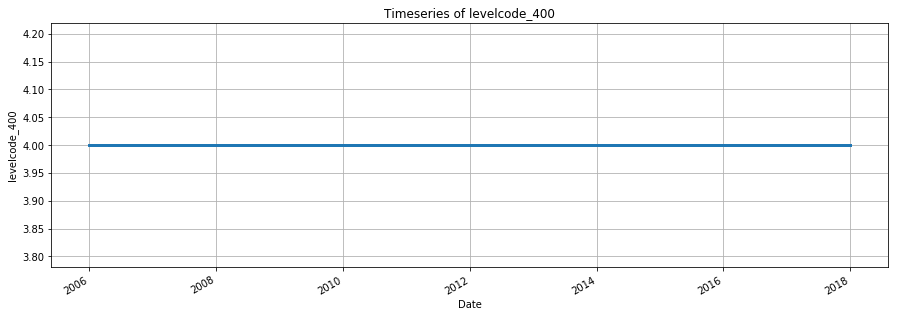

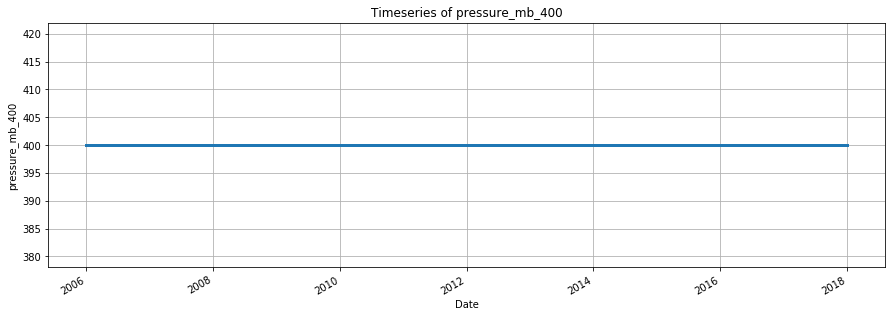

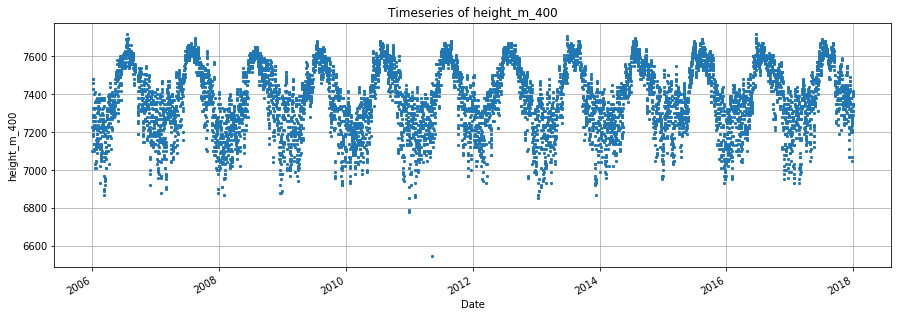

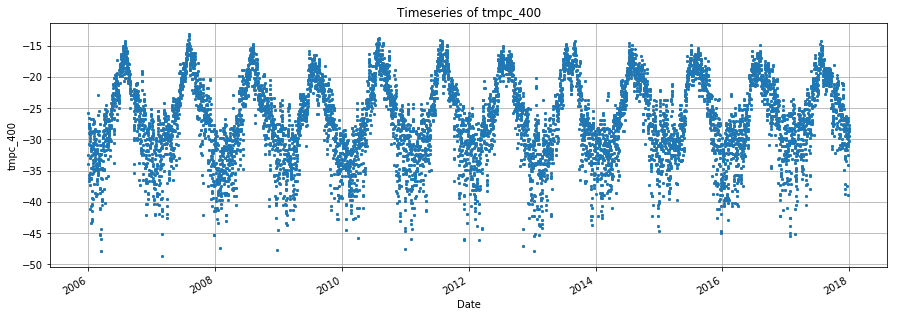

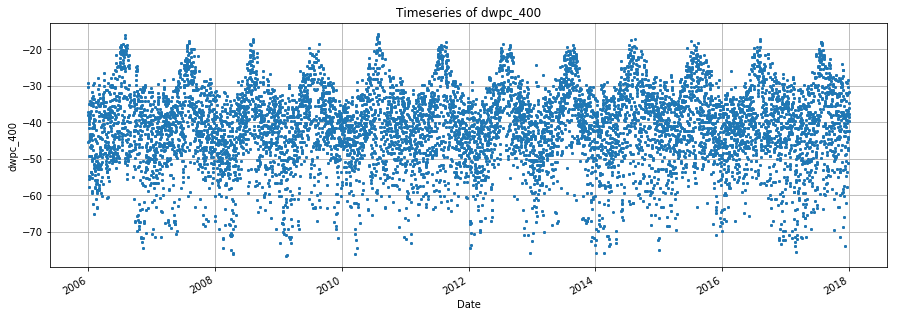

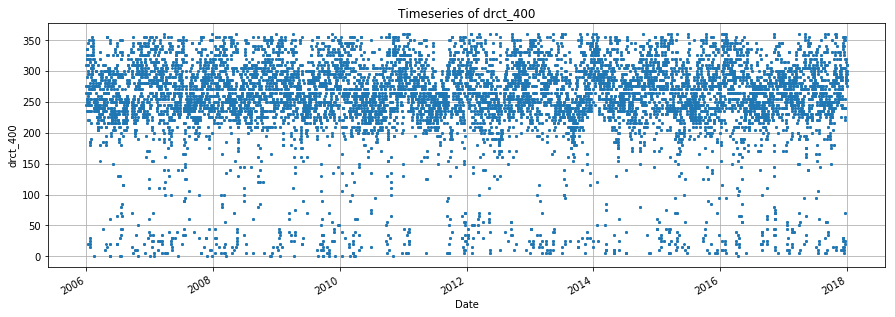

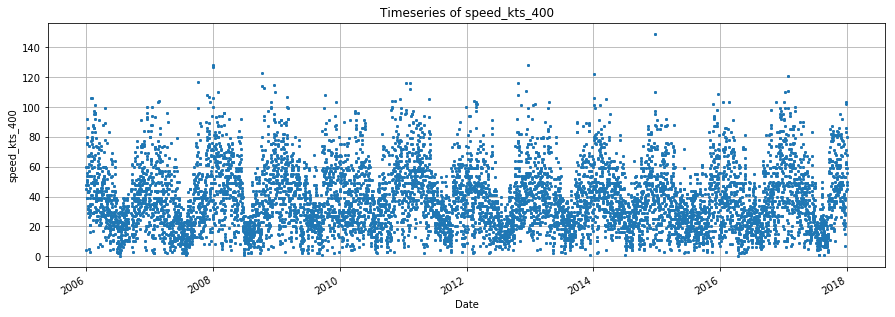

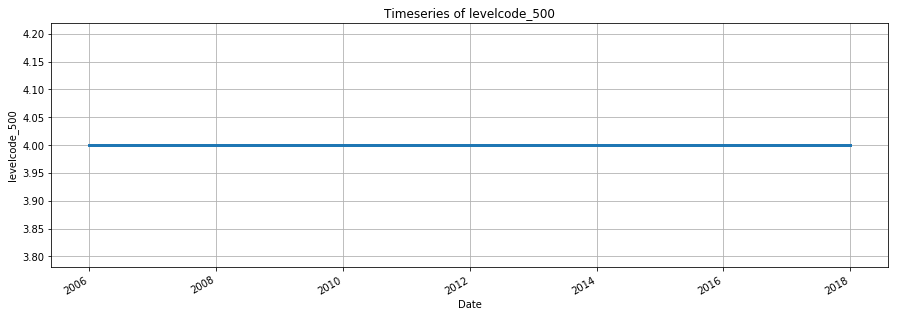

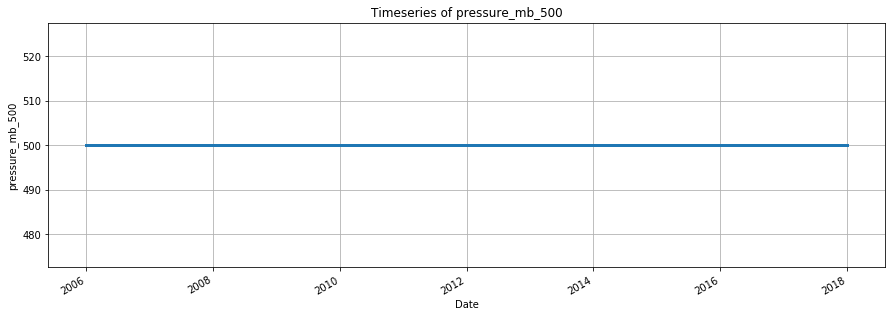

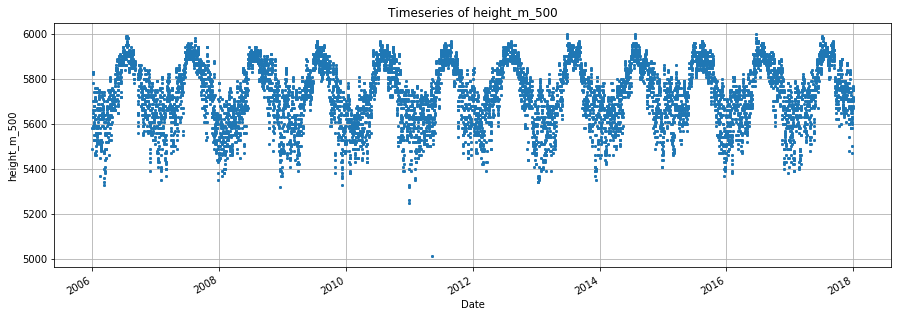

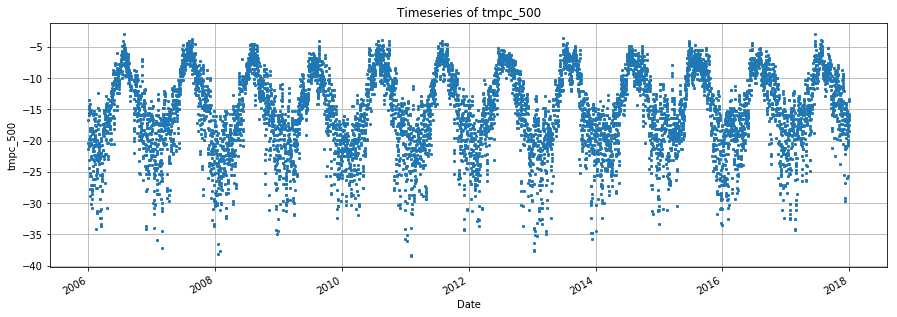

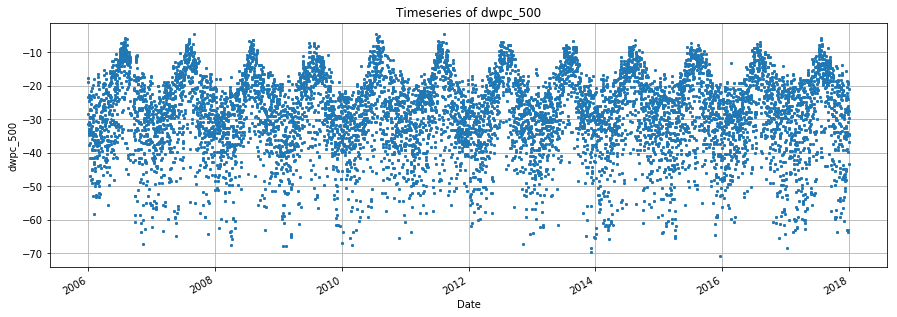

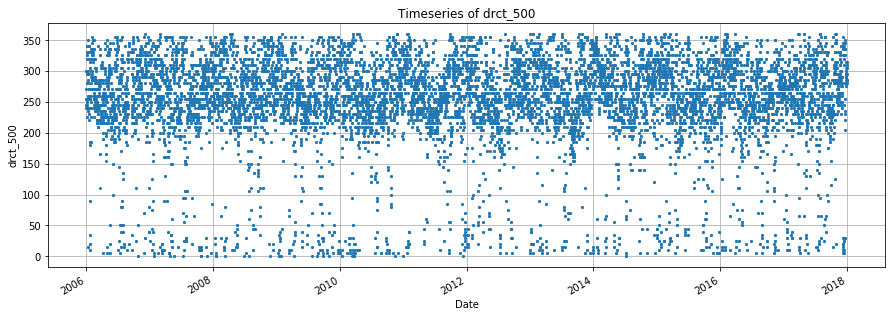

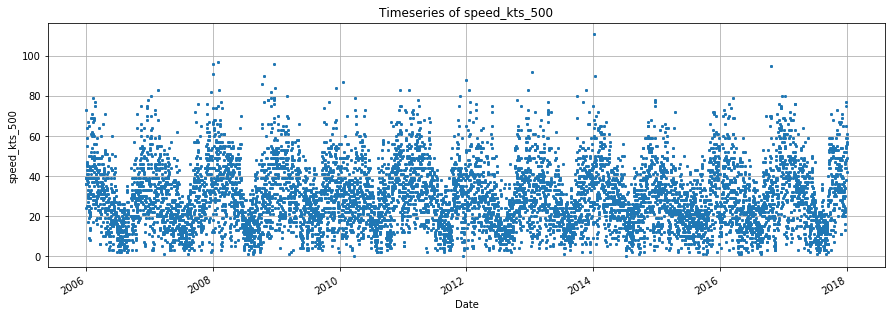

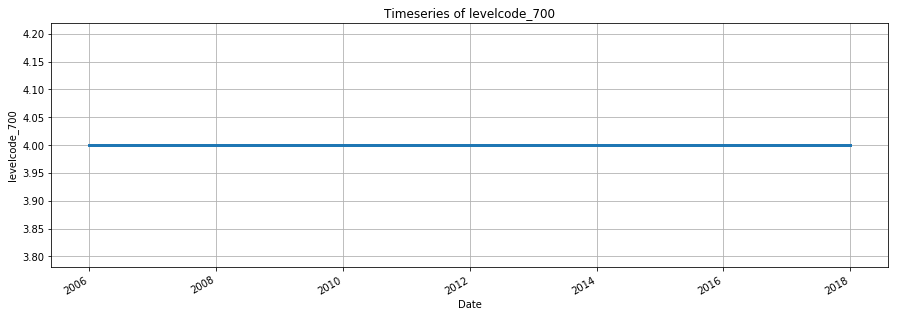

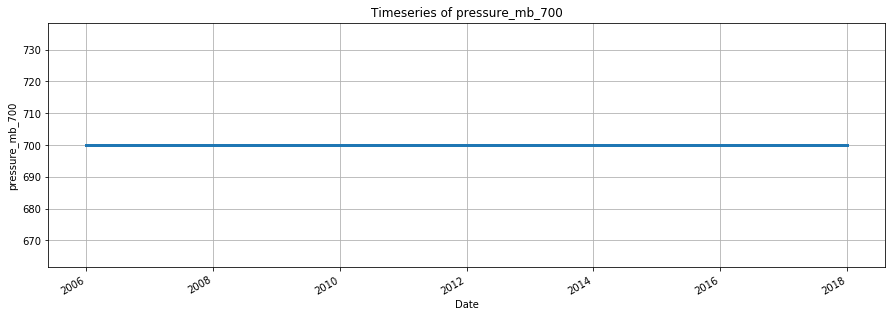

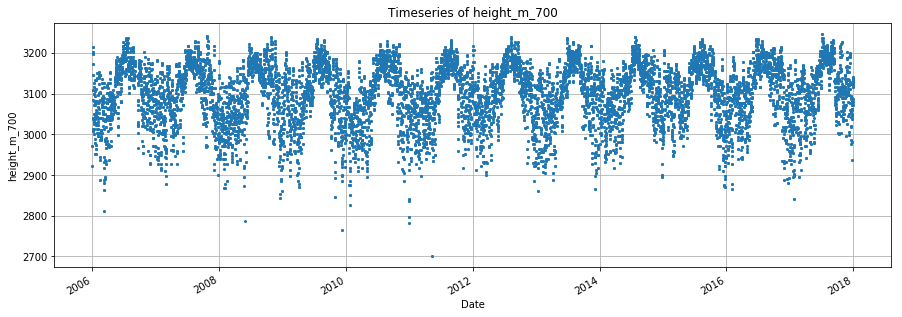

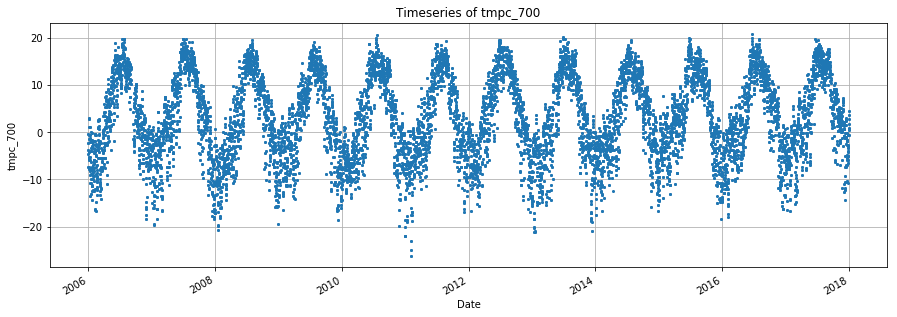

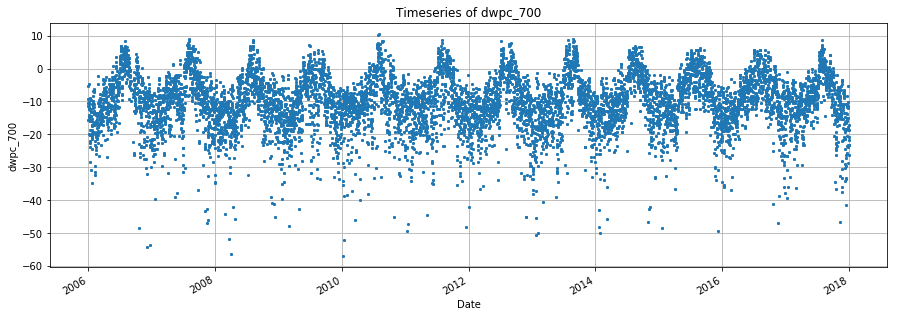

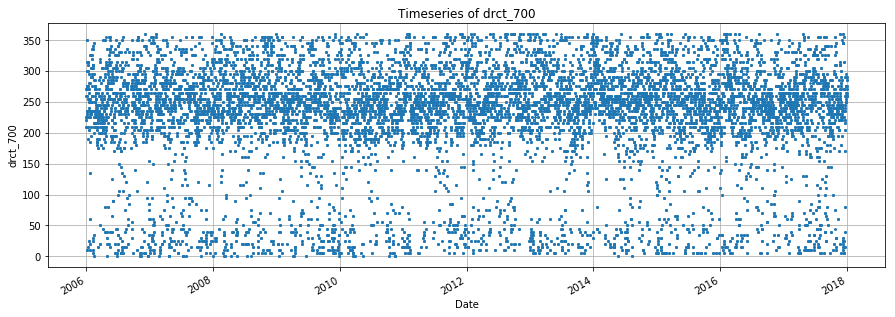

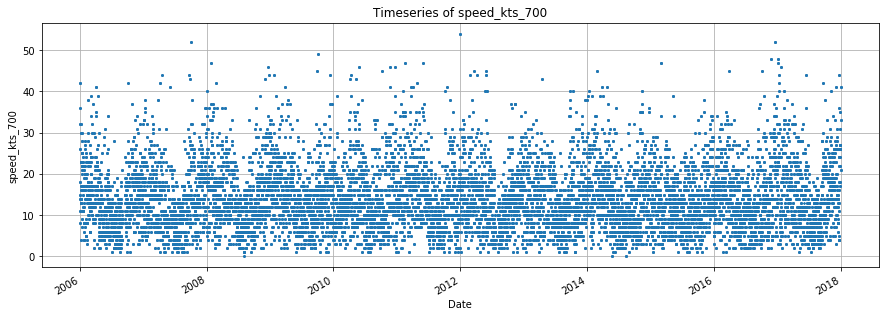

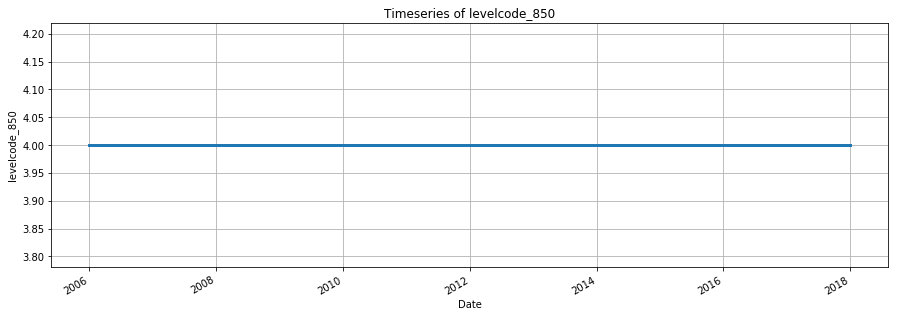

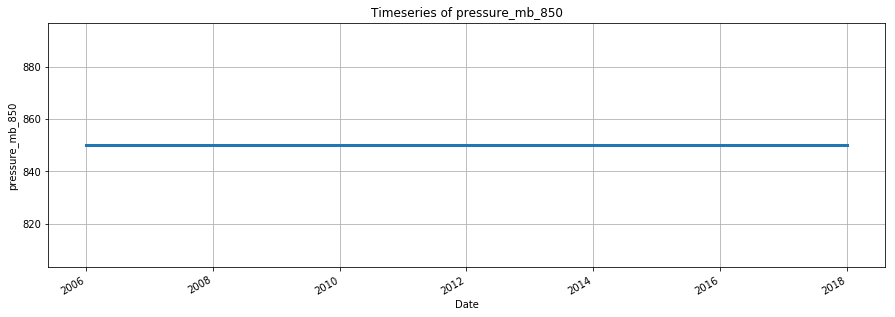

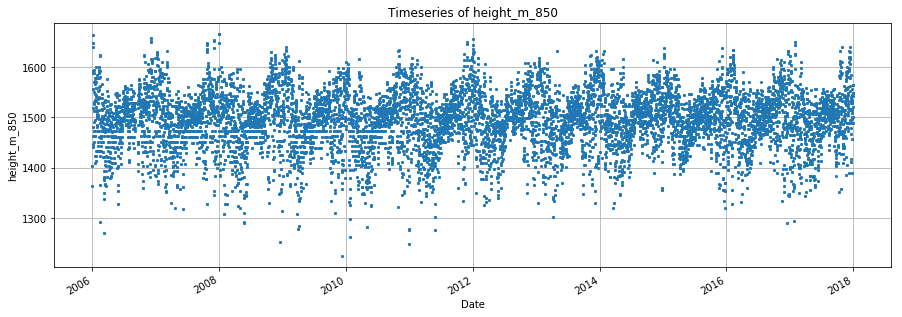

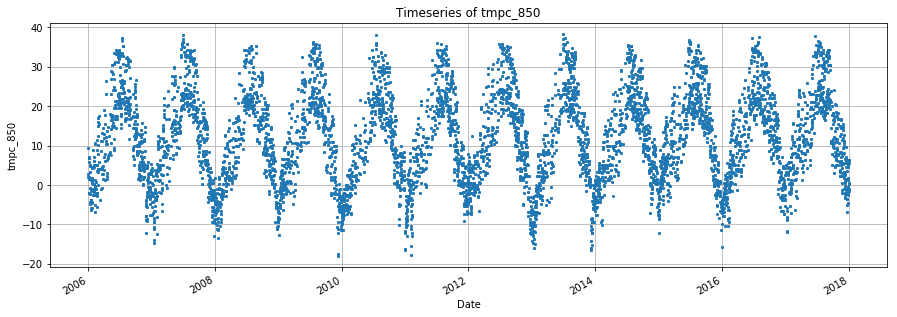

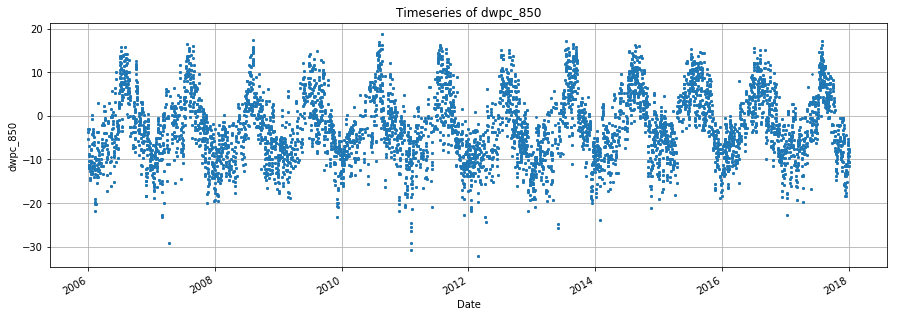

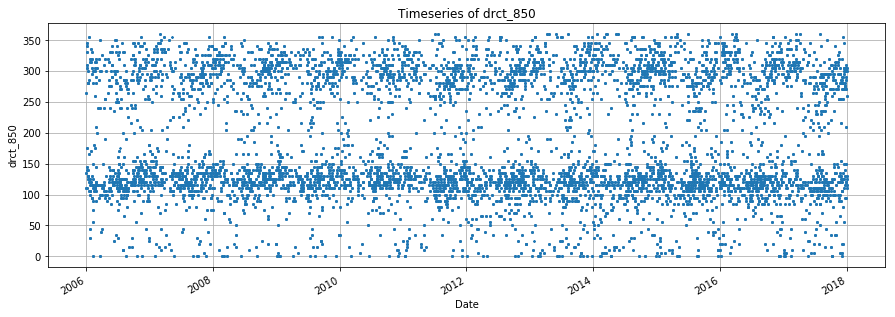

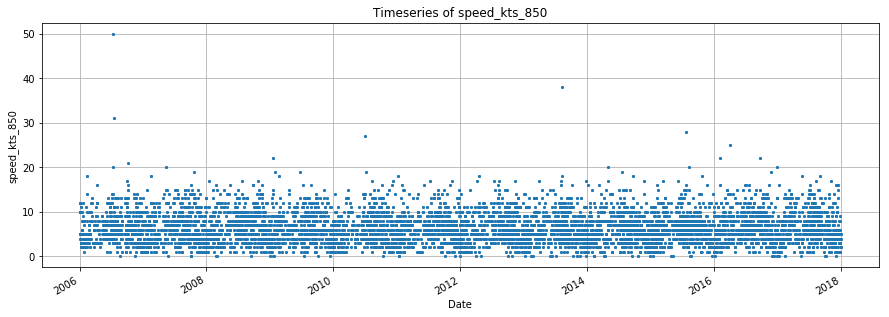

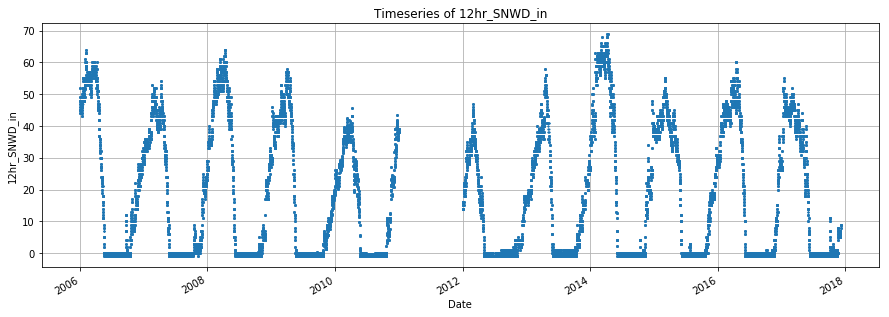

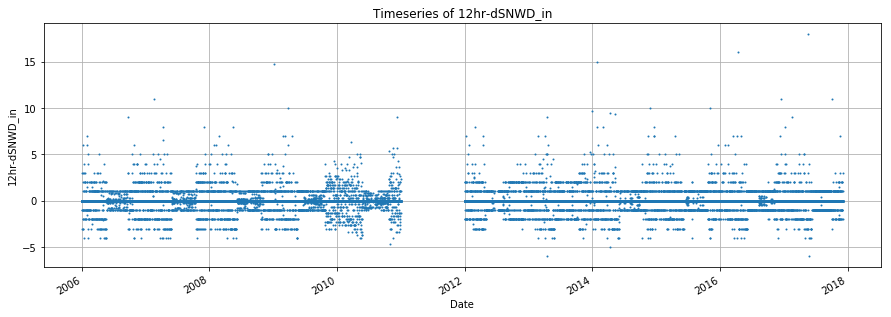

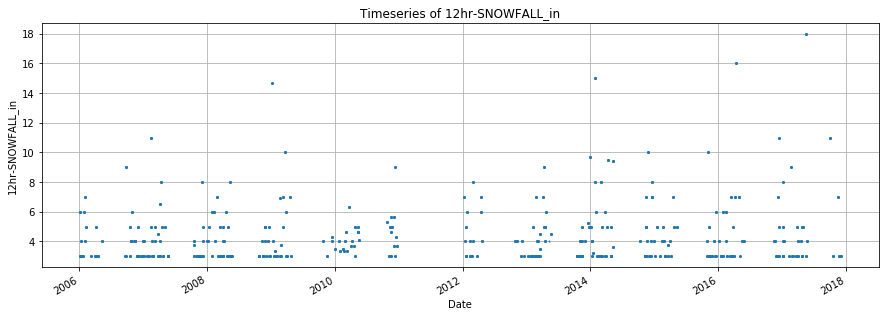

In [7]:
ax = None
#%matplotlib notebook
#keys = ['Pressure_hp']  #['levelcode_500','height_m_500','TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp', 'Julian']
#keys = ['TOBS.I-1 (degC) ', 'SNWD.I-1 (in) ', 'Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', '1hr_Precipitation_mm', '6hr_Precipitation_mm','LXV_Pressure_hp'] #, 'Julian', 'pressure_mb_500', 'height_m_500', 'tmpc_500', 'dwpc_500', 'drct_500', 'speed_kts_500', 'bearing_500', 'range_sm_500', '12hr_SNWD_in', '12hr-dSNWD_in', '12hr-SNOWFALL_in']
keys = asos_snotel_UA_df.keys().tolist()
print(keys)
print(asos_snotel_UA_df.info())
#fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for k in range(len(keys)):
    fig = plt.figure(figsize=(15,5))
    ax = None
    ax = asos_snotel_UA_df[keys[k]]['2006':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 2)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    
    plt.title("Timeseries of " + keys[k])
 
    plt.grid()
    plt.axis('tight')
    fig.savefig(str(k)+'.png')
    plt.show()
    
    fig.clf()
    plt.close()
  

# plt.show()


** &#8657; Some notes:  
There is a a lot of missing data for year 2011 and 2016 - this should be kept in mind as it could skew some our analyeses slightly  **



***


## Linear Regression of meteorological variables and snowfall

**Linear Regression plots were created and regression statistics were calculated using SciPy's linegress function:**

ValueError: cannot reindex from a duplicate axis

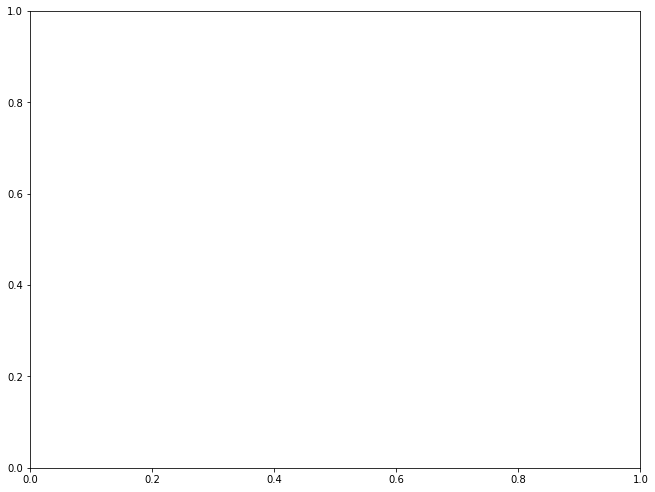

In [8]:
from scipy.stats import pearsonr, linregress
#keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover_oktas', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']
keys = asos_snotel_UA_df.keys().tolist()

fig = plt.figure(figsize=(35,200))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
yy = None

yy = (asos_snotel_UA_df['12hr-SNOWFALL_in']>=3)
snf_df = asos_snotel_UA_df['12hr-SNOWFALL_in'][yy]



for k in range(len(keys)):
    xx_df = None
    plt.subplot(20,3,k+1)

    xx_df = asos_snotel_UA_df[keys[k]].resample('12H').mean()


    idx = np.isfinite(xx_df) & np.isfinite(snf_df)
    sns.regplot(xx_df[idx], snf_df[idx])
    
    pearson, pv = pearsonr(xx_df[idx], snf_df[idx])
    slope, intercept, r_value, p_value, std_err = linregress(xx_df[idx], snf_df[idx])
    

    plt.annotate(' slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n Std error: ' + str(round(std_err,3)) +
                 '\n Pearson: ' + str(round(pearson,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)
                                      
#    print()
#    print(str(keys[k]))
#    print('slope: '+ str(slope))
#    print('intercept:')
plt.show()




** **

**From these plots, we can see some small relationship between snowfall amounts for some meteorological variables.  **

**Note that The lineregress function tests the hypothesis that there is no relationship between tested variables (i.e. test whether the slope of the linear regression line is zero).  For Dewpoint and Pressure, we can confidently reject that hypothesis as the returned p values are less then 0.05. The p value returned for Cloud Cover was 0.052, just over 0.05 indicating fairly strong confidence as well.  Here are a few notes on each linear regression relationship for each variable:  **
* **SNOTEL Temperature (TOBS (deg C)): shows very little linear relationship with snowfall.  However, one should note there is a parabolic shape to the datapoints in the SNOTEL Temperature plot.** 
* **ASOS Temperature (Temperture_degC): same as SNOTEL Temerature.** 
* **Dewpoint: Snowfall events tend to occur at higher dewpoints, and none occur when dewpoints are greater then 0 deg C.  Physically, this would be expected as colder air cannot hold too much moisture.**
* **Wind Direction:  While there does appear to be a slight positive correlation, Wind Direction is not physically a linear measurement.  Therefore, this relationship should be applied cautiously.**  
* **Wind Speed:  Here we see a very slight positive relationship between snowfall totals and wind speed.  The Pearson coefficient is quite low here.**  
* **Cloud Cover:  Of all the variables, Cloud Cover shows the strongest relationship of all the variables (highest R value and Pearson coefficient, along with smallest p value).  This would be expected as larger snowstorms would tend to occur during extended cloudy periods.  However, this relationship should be viewed with caution as first, cloud cover is a categorical variable.  Second, cloud cover values were found to be primarily 0, 4, or 8, so there is little resolution to the data.  Also, cloud cover from years 2015-2017 were removed due to anomalous data (see outlier tab) where no the max data reported was only four. By removing these three years, the cloud cover-snowfall relationship did improve substantially.**
* **Snow Depth (SNWD) - Interestingly, there is a relationship here although physically snowdepth cannot be a variable which affects snowfall amounts.  This relationship is likely due to climatology - larger snowfall may tend to occur in March/April timeframe whenever snowpack has developed already.  This relationship could be investigated further.**  
* **Pressure:  This is another variable which appears to have a relationship with snowfall based on its p value.  Physically, one would expect higher snowfall amounts during periods of lower pressure.  This is indeed what we are seeing.  Another thing to check is pressure changes (3-hr, 24-hr, etc) to see if there is any relationship between snowfall amounts and pressure trends.**


***

## Linear Regression Transformations

In [ ]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,120))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events Concurrent with Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.972)



snf_df = asos_snotel_df['12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)



keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

#keys = ['Temperature_degC']
for k in range(len(keys)):
    
    
    xx_df = None
    

    xx_df = asos_snotel_df[keys[k]].resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = xx_df.loc[snf_df.idxmax()]
    
    
    #print(xx_df[snf_df.idxmax()])
    #print(snf_df.idxmax())
    #print(xx_df.loc[snf_df.idxmax()])
    #print(subtra3_df)
    #print(xx_df['05-2017'])
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
        
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff3_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    


   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


### Linear Regression Transformation - Meteorological Events 12-hr Before Snowfall Event

In [ ]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,127))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events 12-hrs before Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.97)



snf_df = asos_snotel_df['12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)



keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

for k in range(len(keys)):
    
    
    xx_df = None
    

    xx_df = asos_snotel_df[keys[k]].shift(+12).resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()][keys[k]]
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    


   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


### Linear Regression Transformation - Meteorological Events 24-hr Before Snowfall Event

In [ ]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,127))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events 24-hrs before Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.tight_layout()
fig.subplots_adjust(top=0.97)



snf_df = asos_snotel_df['12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)



keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

for k in range(len(keys)):
    
    
    xx_df = None
    

    xx_df = asos_snotel_df[keys[k]].shift(+24).resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()][keys[k]]
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    


   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


# Pressure Drops vs Snowfall


In [ ]:


asos_snotel_df['1-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+1)
asos_snotel_df['3-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+3)
asos_snotel_df['6-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+6)
asos_snotel_df['12-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+12)
asos_snotel_df['18-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+18)
asos_snotel_df['24-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+24)
asos_snotel_df['48-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+48)


asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'] = asos_snotel_df['1-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_1-hr-dLXV_Pressure_hp'] = asos_snotel_df['1-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_3-hr-dLXV_Pressure_hp'] = asos_snotel_df['3-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_3-hr-dLXV_Pressure_hp'] = asos_snotel_df['3-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_6-hr-dLXV_Pressure_hp'] = asos_snotel_df['6-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_6-hr-dLXV_Pressure_hp'] = asos_snotel_df['6-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'] = asos_snotel_df['12-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'] = asos_snotel_df['12-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_18-hr-dLXV_Pressure_hp'] = asos_snotel_df['18-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_18-hr-dLXV_Pressure_hp'] = asos_snotel_df['18-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_24-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_24-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_48-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_48-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()

#print(asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'].describe())
#print(asos_snotel_df.head())

fig = plt.figure(figsize=(25,10))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n %90s" % ("Linear Regression Transformation - Meteorological Events 6, 18, 24, 48-hrs before Snowfall Event", "Larger points correspond to larger difference between snowfall and meteorologcal event") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.92)


#ax1 = plt.subplots(1, 1)
idx1 = np.isfinite(asos_snotel_df['12-hr_max_6-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx2= np.isfinite(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx3 = np.isfinite(asos_snotel_df['12-hr_max_18-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx4 = np.isfinite(asos_snotel_df['12-hr_max_24-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx5 = np.isfinite(asos_snotel_df['12-hr_max_48-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
    #idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    #idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
pearson1, pv1 = pearsonr(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
   # pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    #pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
    #slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    #slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])
ax1 = sns.regplot(asos_snotel_df['12-hr_min_6-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.2, 's':30, "label": "6-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx2], snf_df[idx2], scatter_kws={'alpha':0.2, 's':90, "label": "12-hr"})
ax1 =  sns.regplot(asos_snotel_df['12-hr_min_18-hr-dLXV_Pressure_hp'][idx3], snf_df[idx3], scatter_kws={'alpha':0.2, 's':180, "label": "18-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_24-hr-dLXV_Pressure_hp'][idx4], snf_df[idx4], scatter_kws={'alpha':0.2, 's':360, "label": "24-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_48-hr-dLXV_Pressure_hp'][idx5], snf_df[idx5], scatter_kws={'alpha':0.2, 's':500, "label": "48-hr"})
#sns.regplot(asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.1, })




In [ ]:
print(asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'].describe())
print(asos_snotel_df.head())

fig = plt.figure(figsize=(50,10))
asos_snotel_df['1-hr-dLXV_Pressure_hp'].plot(linestyle='None',  marker = ".", markersize = 4, alpha = 0.5)
asos_snotel_df['3-hr-dLXV_Pressure_hp'].plot(linestyle='None',  marker = ".", markersize = 4, alpha = 0.5)

plt.show()

fig = plt.figure(figsize=(50,10))
asos_snotel_df['1-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(linestyle='None',  marker = ".", markersize = 14, alpha = 0.5)
#asos_snotel_df['3-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(linestyle='None',  marker = ".", markersize = 14, alpha = 0.5)
asos_snotel_df['LXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(marker = ".", alpha = 0.5, secondary_y = True)

plt.show()

print(asos_snotel_df.loc[:,['LXV_Pressure_hp','1-hr-dLXV_Pressure_hp']]['12-31-2010':'01-02-2012'])
#print(asos_snotel_df['LXV_Pressure_hp']['01-01-2012':'01-02-2012'], asos_snotel_df['3-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'])



   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})